# Construyendo Self Avoiding Walk

In [128]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
def C_plano(m,n):
    if m < 3 or n < 3:
        raise Exception('m and n must be greater than 3')
    plano = np.zeros((m,n))
    plano[0,:] = 1.0
    plano[m-1,:] = 1.0
    plano[:,0] = 1.0
    plano[:,n-1] = 1.0
    return plano

In [145]:
def check_surr(plano_b, m, n):
    dir = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])
    vecinos = dir + [m, n]
    valores = plano_b[vecinos[:, 0], vecinos[:, 1]]
    indices_cero = np.where(valores == 0)[0]
    if len(indices_cero) == 0:
        return False
    indice_aleatorio = np.random.choice(indices_cero)
    nueva_pos = vecinos[indice_aleatorio]
    return nueva_pos[0], nueva_pos[1], len(indices_cero)

In [146]:
def graficar_camino(coord_list, m, n):
    if not coord_list:
        raise ValueError("La lista de coordenadas está vacía")

    xs, ys = zip(*coord_list)

    plt.figure(figsize=(n / 2, m / 2))
    plt.plot(xs, ys, color='red', linewidth=2)
    plt.xlim(0, n)
    plt.ylim(0, m)

    plt.grid(True)
    plt.xticks(range(n+1))
    plt.yticks(range(m+1))
    plt.gca().set_aspect('equal')
    plt.title('Self Avoiding Walk')
    plt.show()

In [142]:
def construir_camino(p, q):
    plano = C_plano(p, q)
    plano[1,1] = 1.0
    cord_x, cord_y = 1, 1
    listado = [[cord_x, cord_y]]
    k_j = []
    while check_surr(plano, cord_x, cord_y):
        cord_x, cord_y, num_k = check_surr(plano, cord_x, cord_y)
        listado.append([cord_x, cord_y])
        k_j.append(num_k)
        plano[cord_x, cord_y] = 1.0
    return listado, k_j

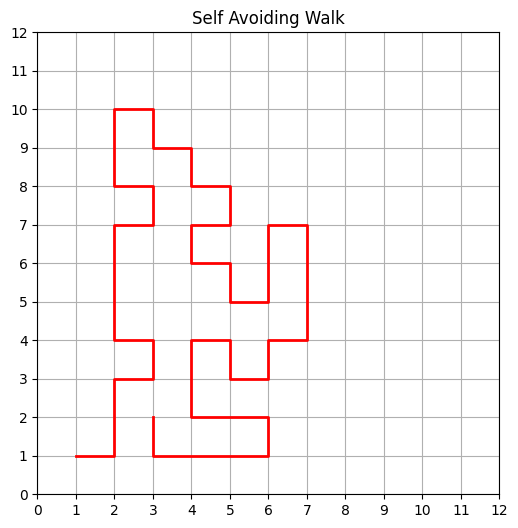

In [147]:
try2, k_j= construir_camino(12, 12)
graficar_camino(try2, 12, 12)

Diseño 1 de g(x)

In [136]:
def g1(KJ):
    return 1/np.prod(KJ)

In [137]:
g1(k_j)

np.float64(3.5722450845907635e-06)

In [ ]:
def aproximacion_g1(jh)